In [51]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading the required files
frozen_graph = 'F:/opencv/frozen_inference_graph.pb'
config_file = 'F:/opencv/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

# Loading the pre-trained model

model = cv2.dnn_DetectionModel(frozen_graph,config_file)

# Reading the label file

Label = []
with open('label.txt', 'rt') as lbl:
    Label = lbl.read().rstrip('\n').split('\n')
    #label.append(labels)


print(Label)

print(len(Label))



['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [52]:
Label[1]

'bicycle'

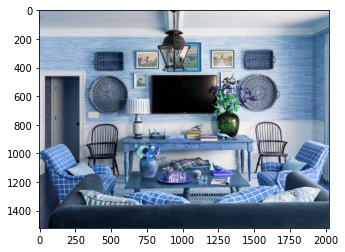

In [53]:
# Object detection in an image 

# Reading an image
img = cv2.imread('family-room-1-1588080207.jpg')

# Showing the image
plt.imshow(img); #bgr

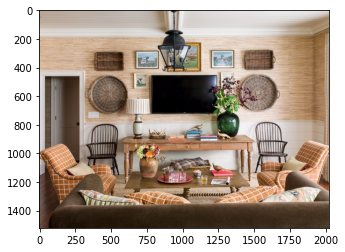

In [54]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); # Changing to RGB color format

In [55]:
# Setting the input according to model architecture

model.setInputSize(320,320)
model.setInputScale(1.0/127.5) # 255/2 = 127.5
model.setInputSwapRB(True) # To automatically convert from bgr to RGB
model.setInputMean((127.5,127.5,127.5))

<dnn_Model 000001C489E1CC50>

In [82]:
# Modelling

classindex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [83]:
print(classindex)

[[86]
 [62]
 [72]
 [64]
 [63]
 [62]
 [62]
 [62]
 [86]
 [86]
 [67]
 [64]
 [63]
 [67]
 [84]
 [62]]


In [84]:
print(confidence)

[[0.7657011 ]
 [0.73920244]
 [0.72943205]
 [0.66916436]
 [0.64484906]
 [0.6342484 ]
 [0.62797743]
 [0.62216353]
 [0.5955518 ]
 [0.58622897]
 [0.5788079 ]
 [0.5778768 ]
 [0.55809146]
 [0.5502559 ]
 [0.5461725 ]
 [0.523559  ]]


In [85]:
print(bbox)

[[1262  713  135  169]
 [ 300  787  291  384]
 [ 771  447  529  293]
 [1200  501  214  379]
 [  74 1157 1921  348]
 [1672  915  343  336]
 [1451  783  258  443]
 [  16  942  273  363]
 [ 704 1021  133  144]
 [1225  709  140  181]
 [ 606  870  901  323]
 [ 678  930  169  233]
 [1672  915  343  336]
 [ 405  919 1083  339]
 [1212 1153  119   43]
 [1503  792  281  408]]


In [86]:
bbox[0]+20

array([1282,  733,  155,  189], dtype=int32)

In [89]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

for classind, conf, boxes in zip(classindex.flatten(),confidence.flatten(), bbox):
    if(len(Label)<=80):
        print(classind)
        cv2.rectangle(img,boxes,(255,0,0),2) #bgr
        cv2.putText(img,Label[classind-1].upper(),(boxes[0]+10,boxes[1]+30),font, 
                fontScale=font_scale, color=(0,255,0), thickness=3)
        cv2.putText(img,str(round(conf*100,2)),(boxes[0]+200,boxes[1]+30),font, 
                fontScale=font_scale, color=(0,255,0), thickness=3)

86


IndexError: list index out of range

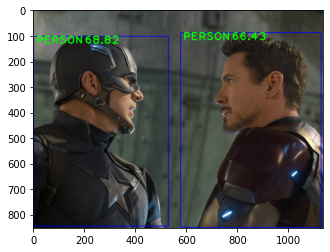

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

## Video detection

In [15]:
video = cv2.VideoCapture('22.mp4')

video.set(cv2.CAP_PROP_FRAME_WIDTH, 1300)
video.set(cv2.CAP_PROP_FRAME_HEIGHT, 1500)

# Checking if the video is working properly
if not video.isOpened():
    video=cv2.VideoCapture(0)
    raise IOError('Cannot open video')
    
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True: 
    ret,frame= video.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.7)
    print(ClassIndex)
    if(len(Label)!=0): #Checking if the labels are present
        for classind, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(), bbox):
            if(len(Label)<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2) #bgr
                cv2.putText(frame,Label[classind-1].upper(),(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color=(0,255,0), thickness=3)
    
    # displaying predictions
    cv2.imshow('Object detection in the video', frame)
    
    ## press q to quit
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# close the video
video.release()
cv2.destroyAllWindows()

[[3]]
[[3]]
[[3]]
[[3]
 [3]]
[[3]]
[[3]]
[[3]]
[[3]
 [3]
 [3]]
[[3]
 [3]]
[[3]
 [3]
 [3]]
[[3]]
[[3]]
[[3]
 [3]
 [3]]
[[3]]
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]]


## Webcam detection

In [ ]:
cap = cv2.VideoCapture(0)

# Checking if the video is working properly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
    raise IOError('Cannot open webcam')
    
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True: 
    ret,frame= cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.7)
    print(ClassIndex)
    if(len(Label)!=0): #Checking if the labels are present
        for classind, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(), bbox):
            if(len(Label)<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2) #bgr
                cv2.putText(frame,Label[classind-1].upper(),(boxes[0]+10,boxes[1]+40),font, 
                            fontScale=font_scale, color=(0,255,0), thickness=3)
                cv2.putText(frame,str(round(conf*100,2)),(boxes[0]+200,boxes[1]+40),font, 
                            fontScale=font_scale, color=(0,255,0), thickness=3)
    
    # displaying predictions
    cv2.imshow('Object detection in the webcam', frame)
    
    ## press q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# closing the webcam
cap.release()
cv2.destroyAllWindows()

# Using YOLO network

In [62]:
# Loading Yolo Network
net = cv2.dnn.readNet('yolov3.weights','yolov3.cfg')

In [63]:
# Loading coco labels
classes=[]
with open('coco.names','r') as c:
    for line in c:
        classes.append(line.strip())

In [64]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [65]:
layer_names = net.getLayerNames()

In [66]:
net.getUnconnectedOutLayers()

array([[200],
       [227],
       [254]], dtype=int32)

In [67]:
output_layers=[layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()] #Loading output layers to show the detected result
colors = np.random.uniform(0, 255, size=(len(classes), 3))

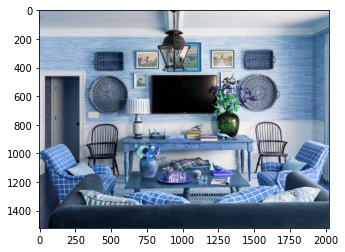

In [68]:
image = cv2.imread('family-room-1-1588080207.jpg')
plt.imshow(image)

In [69]:
image = cv2.resize(image, None, fx=0.4, fy=0.4) # Resizing the image
height, width, channels=image.shape

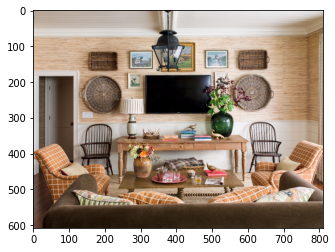

In [70]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #bgr to RGB

### Detecting objects from the image

In [71]:
# We can’t use right away the full image on the yolo network, first we need it to convert it into a blob. 
# Blob is used to extract feature from the image and to resize them.

blob = cv2.dnn.blobFromImage(image,0.00392, (416,416), (0,0,0), True, crop=False)

In [72]:
# Watching the contents of blob
for b in blob:
    for n,img_blob in enumerate(b):
        cv2.imshow(str(n), img_blob)

cv2.waitKey(100)
cv2.destroyAllWindows()


In [73]:
# Now sending the processed blob image into the yolo algorithm
net.setInput(blob)
outs=net.forward(output_layers)
print(outs)  # Printing out the detections

[array([[0.03874863, 0.04745923, 0.48823637, ..., 0.        , 0.        ,
        0.        ],
       [0.05037373, 0.03289013, 0.30587345, ..., 0.        , 0.        ,
        0.        ],
       [0.05149728, 0.0360944 , 0.7687829 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95387685, 0.9547802 , 0.3804796 , ..., 0.        , 0.        ,
        0.        ],
       [0.9554549 , 0.9657245 , 0.29233584, ..., 0.        , 0.        ,
        0.        ],
       [0.9707083 , 0.96389014, 0.8123149 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01661487, 0.02229507, 0.04603644, ..., 0.        , 0.        ,
        0.        ],
       [0.01852894, 0.01802227, 0.41669077, ..., 0.        , 0.        ,
        0.        ],
       [0.02314257, 0.0168556 , 0.071698  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.977006  , 0.9784193 , 0.03796676, ..., 0.        , 0.        ,
        0.        ],
       [0.9823668 

In [74]:
# Showing information on the screen

class_ids=[]
confidences=[]
boxes=[]

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.6:
            # Object detected
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            # Rectangle coordinates
            x = int(center_x-w/2)
            y = int(center_y-h/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
        

In [75]:
class_ids

[56, 56, 57, 57, 57, 57, 75, 75, 56, 56, 56, 56, 56, 75, 56, 75, 73, 75, 75]

In [ ]:
# When we perform the detection, it happens that we have more boxes for the same object. 
# so we should use another function to remove this “noise”.
# It’s called Non maximum suppresion.

indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.6,0.4)

In [ ]:
indexes

In [ ]:
# Finally showing all the informations on the screen
font = cv2.FONT_HERSHEY_PLAIN

for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(image,(x,y),(x+w,y+h), color, 2)
        cv2.putText(image,label,(x,y+30),font,3,color,3)

cv2.imshow('Image',image)

cv2.waitKey(0)
cv2.destroyAllWindows()